In [36]:
# import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv('data/ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [51]:
# Let's look at rating counts
data.rating.value_counts()

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

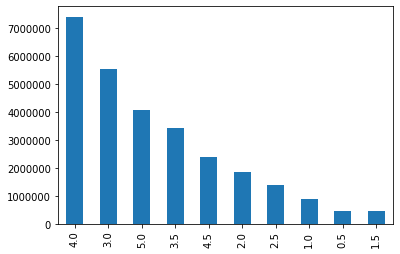

In [52]:
# Let's see this distribution in a plot
data.rating.value_counts().plot(kind='bar')
plt.show()

In [53]:
# Checking null values in the dataset
data.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [82]:
# Let's remove timestamp
data = data[['userId', 'movieId', 'rating', 'timestamp']]
data = data.iloc[:, :-1]

In [83]:
data.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [64]:
# We'll use a Reader object and load_from_df() method to work with pandas dataframe
from surprise import Reader, Dataset

reader = Reader()
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

In [65]:
# Let's split the dataset into training and test sets (75% and 25% respectively).
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [66]:
# We'll use the famous SVD algorithm. SVD is a Matrix Factorization technique which is usually more effective because it allows us to discover the latent features underlying the interactions between users and items.
from surprise import SVD, accuracy

algo = SVD()
algo.fit(trainset)

In [77]:
# we can now query for specific predicions
uid = str(196)  # user id
iid = str(302)  # movie id

# Get a prediction for the given users and items.
# https://surprise.readthedocs.io/en/stable/algobase.html#surprise.prediction_algorithms.algo_base.AlgoBase.predict
algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 3.53   {'was_impossible': False}


Prediction(uid='196', iid='302', r_ui=4, est=3.530505427242351, details={'was_impossible': False})

# Evaluation

In [78]:
# Run the trained model against the testset
test_pred = algo.test(testset)

In [79]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.7979


0.7979234099448068

In [80]:
# if you wanted to evaluate on the trainset
print("User-based Model : Training Set")
train_pred = algo.test(trainset.build_testset())
accuracy.rmse(train_pred)

User-based Model : Training Set
RMSE: 0.6775


0.6775029715463058